In [2]:
import pandas as pd
import os
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import scipy
import itertools
from sklearn.metrics import mean_squared_error

In [3]:
os.chdir("D:\work\corona")

In [4]:
df = pd.read_csv("D:/work/git corona/eg_covid.csv")

In [5]:
df = df[:-1]

In [6]:
X = df.index.values
X = X.reshape((87,1))
X_train = X
X_test = X
y = df["Total.Cases"]
y_train = y
y_test = y

In [7]:
l=[]
for i in range(2,12):
    poly = PolynomialFeatures(i)
    X_deg_train = poly.fit_transform(X_train)
    X_deg_test = poly.fit_transform(X_test)
    reg = LinearRegression().fit(X_deg_train, y_train)
    err = mean_squared_error(y_test, reg.predict(X_deg_test))
    l.append(err)
    print(i , err)

2 1983616.9812284634
3 221986.91578783694
4 48481.99653606016
5 46892.18607668038
6 37893.793331253415
7 26062.720303553597
8 17874.161477986
9 18652.826776372603
10 17423.933119720463
11 14591.253700599476


In [8]:
np.argmin(l)

9

In [9]:
i= 11
poly = PolynomialFeatures(i)
X_deg_train = poly.fit_transform(X_train)
X_deg_test = poly.fit_transform(X_test)
reg = LinearRegression().fit(X_deg_train, y_train)
err = mean_squared_error(y_test, reg.predict(X_deg_test))
l.append(err)
print(i , err)

11 14591.253700599476


In [10]:
reg.predict(X_deg_test)

array([  282.88248538,   282.88453293,   282.93692591,   283.25048812,
         284.2786715 ,   286.73194714,   291.54570739,   299.8189108 ,
         312.73727349,   331.49179657,   357.20079165,   390.84129585,
         433.19382739,   484.80279622,   545.95352543,   616.66573449,
         696.70246041,   785.59272531,   882.66577709,   987.09441251,
        1097.94471993,  1214.22953223,  1334.96294238,  1459.21338601,
        1586.15302282,  1715.10143468,  1845.56199016,  1977.24958854,
        2110.10887913,  2244.32244233,  2380.30880697,  2518.710554  ,
        2660.37311138,  2806.31517096,  2957.69194833,  3115.75275578,
        3281.7945605 ,  3457.1133527 ,  3642.95524603,  3840.46927601,
        4050.66384737,  4274.36870993,  4512.20421443,  4764.5594163 ,
        5031.58035986,  5313.16959024,  5608.9976108 ,  5918.52663461,
        6241.04657616,  6575.72280113,  6921.6547054 ,  7277.94373943,
        7643.76903949,  8018.46838498,  8401.62178226,  8793.13459338,
      

In [33]:
new_x= np.arange(0,90)
new_x = new_x.reshape((90,1))
new_x = poly.fit_transform(new_x)
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
fig = go.Figure()
X_3 = [np.mean(df["Total.Cases"][i:i+3]) for i in range(0,len(df["Total.Cases"])-3,3)]
fig.add_trace(go.Scatter( x=np.arange(0,105) , y=reg.predict(new_x),
                    mode='lines+markers',
                    name='lines+markers'))
fig.add_trace(go.Scatter( x=df.index.values , y=df["Total.Cases"],
                    mode='lines+markers',
                    name='lines+markers'))

fig.add_trace(go.Scatter( x=list(range(0,len(X_3)-3,3)) , y=X_3,
                    mode='lines+markers',
                    name='lines+markers'))
fig.show()

<Figure size 1440x1280 with 0 Axes>

In [35]:
list(range(0,len(X_3)-3,3))

[0, 3, 6, 9, 12, 15, 18, 21, 24]

In [13]:
reg.predict(new_x)[70:86]-df["Total.Cases"][70:86]

70   -137.384107
71     58.866531
72    232.003629
73    348.085274
74    309.487218
75    167.771858
76      1.653525
77   -286.904540
78   -400.420033
79   -238.400018
80     15.427694
81    206.223981
82    204.561223
83     55.441686
84    -57.095917
85    -45.677807
Name: Total.Cases, dtype: float64

In [14]:
reg.predict(new_x)[86]-df["Total.Cases"][85]

1382.5115746126976

In [15]:
df["Total.Cases"][86]

36829

In [16]:
reg.predict(new_x)[87]

38355.773528562626

In [17]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def norm(x):
    return (x-np.min(x))/(max(x)-min(x))

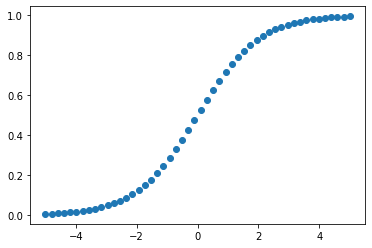

In [17]:
a = np.linspace(-5,5)
b = sigmoid(a)
plt.scatter(x=a,y=b)

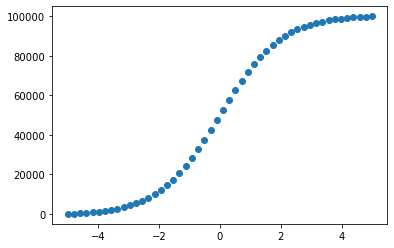

In [20]:
a1 = np.linspace(-5,5)
b1 = norm(sigmoid(a1))*100000
plt.scatter(x=a1,y=b1)

In [246]:
norm(sigmoid(a1))

array([0.        , 0.00152322, 0.00338502, 0.00565892, 0.00843361,
       0.01181555, 0.01593201, 0.02093415, 0.02700025, 0.03433855,
       0.04318953, 0.05382681, 0.06655601, 0.0817103 , 0.09964151,
       0.12070532, 0.14523945, 0.17353415, 0.20579569, 0.2421052 ,
       0.28237765, 0.32632782, 0.37345175, 0.4230312 , 0.4741661 ,
       0.5258339 , 0.5769688 , 0.62654825, 0.67367218, 0.71762235,
       0.7578948 , 0.79420431, 0.82646585, 0.85476055, 0.87929468,
       0.90035849, 0.9182897 , 0.93344399, 0.94617319, 0.95681047,
       0.96566145, 0.97299975, 0.97906585, 0.98406799, 0.98818445,
       0.99156639, 0.99434108, 0.99661498, 0.99847678, 1.        ])

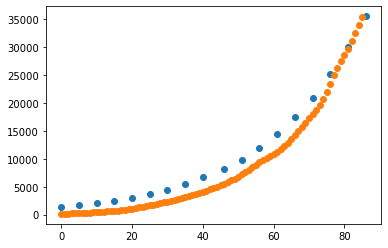

In [48]:
a2 = np.array(list(itertools.compress(np.linspace(-5,5) , np.linspace(-5,5) <= -1.4)))
b2 = sigmoid(a2)*200000
plt.scatter(x=np.round(norm(a2)*86,0),y=b2)
plt.scatter( x=df.index.values , y=df["Total.Cases"])

In [38]:
np.round(norm(a2)*86,0)

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 46., 51., 56., 61.,
       66., 71., 76., 81., 86.])